Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from kaggle. Explore the relationships between variables and identify pattern and trends in the data.

Step 1: FEATURE SCALING

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

NORMALIZATION: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max Scaling.

STANDARDIZATION: Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe().round(2)  #statistical information of all the numerical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


TASK-1 : NORMALIZATION

In [10]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
new_df = pd.DataFrame(df, columns = ['Age', 'Tenure'])

In [13]:
new_df.head(5)

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2


In [14]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     10000 non-null  int64
 1   Tenure  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [17]:
scaler = MinMaxScaler() #Instantiating the MinMaxScaler() function
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


ANOTHER SMALL EXAMPLE BELOW:

In [18]:
x_array = np.array([[2], [3], [5], [6], [6]])

In [20]:
scaler = MinMaxScaler()
normalized_arr = scaler.fit_transform(x_array)
print(normalized_arr)

[[0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]]


TASK-2: STANDARDIZATION

In [22]:
scaler = StandardScaler()
normalized_arr_ss = scaler.fit_transform(x_array)
print(normalized_arr_ss)

[[-1.47709789]
 [-0.86164044]
 [ 0.36927447]
 [ 0.98473193]
 [ 0.98473193]]


Step 2: OUTLIER TREATMENT

Anomalies. Abnormal observations that deviate from the normal values. They are also the most extreme values in the data.

Technique 1: 3-Sigma Technique (Standard Deviation)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [24]:
data = pd.read_csv("raw_sales.csv")

In [25]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [31]:
  # Function to detect outlier on one-dimensional datasets.
def find_anomalies(data):
   #define a list to accumulate anomalies
    anomalies = []

    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation

    anomaly_cut_off = random_data_std + 3
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off

    # generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [32]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [33]:
list_1 = find_anomalies(data['price'])

In [34]:
len(list_1)

4543

In [35]:
len(data)

29580

In [36]:
data.price.skew()

4.312009366902366

C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

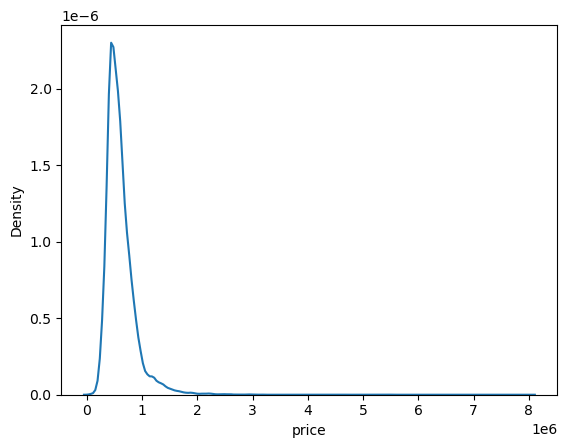

In [38]:
import seaborn as sns
sns.kdeplot(data.price)

In [39]:
data['price_transformed'] = np.log(data.price)

In [40]:
data.price_transformed.skew()

0.4731646269984763

In [41]:
list_2 = find_anomalies(data.price_transformed)

In [42]:
len(list_2)

0

In [43]:
len(data)

29580

C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_transformed', ylabel='Density'>

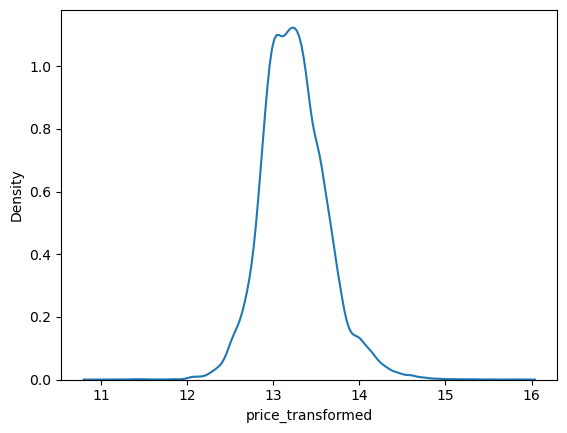

In [45]:
sns.kdeplot(data.price_transformed)

In [47]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [48]:
data['price_transformed_double'].skew()

0.33092530655758573

In [49]:
list_3 = find_anomalies(data.price_transformed_double)

In [50]:
len(list_3)

0

In [51]:
len(data)

29580

BOXPLOTS

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

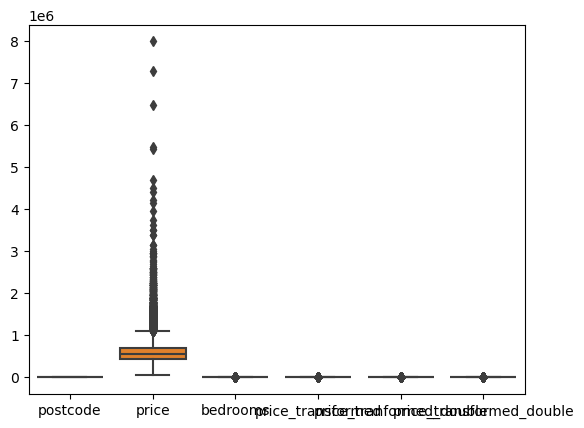

In [54]:
sns.boxplot(data=data)

The above code displays the plot below.
It considers everything above 75 or below 35 to be an outlier. The results are very close to method 1 above.

In [55]:
import pandas as pd
df = pd.DataFrame(data)

In [56]:
len(df)

29580

In [58]:
df

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_tranformed_double,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209,2.537209
...,...,...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363,2.574318,2.574318
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692,2.582917,2.582917
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685,2.568764,2.568764
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181,2.586725,2.586725


In [60]:
# Statistical information of the dataframe columns
df.describe()

,postcode,price,bedrooms,price_transformed,price_tranformed_double,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002,2.766002


INTER-QUARTILE RANGE
IQR = Q3 - Q1

In [61]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [62]:
len(list1)

25

In [63]:
max(list1)

99

In [64]:
min(list1)

43

In [65]:
import statistics
statistics.mean(list1)

76.96

In [66]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the 90th percentile for the ordered scores, start by multiplying 90 percent times the total number of scores, which gives 
90% * 25 = 0.90*25 = 22.5 (the index). Rounding up the nearest whole number, you get 23.

Hence, 98 (23rd element) is the 90th prercentile of the dataset.

Now, you say you want to find the 20th percentile. Start by taking 0.20x25 = 5 (the index).
This is a whole number, which tells you the 20th percentile is the average of the 5th and 6th values in the ordered dataset (62 and 66).

so, 22th percentile is 62+66/2 = 64

The median (the 50th percentile) for the test scores is the 13th score: 77

NUMERICAL ANALYSIS

Dataset info: Sample Data Set containing customer data and showing customers who have left last month

In [109]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
telco_base_data = pd.read_csv("Churn_Modelling.csv")

In [91]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
telco_new = telco_base_data[['Geography', 'Gender', 'Exited']]

In [112]:
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [94]:
telco_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [95]:
telco_new.Exited.value_counts()/len(telco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

Univariate Analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

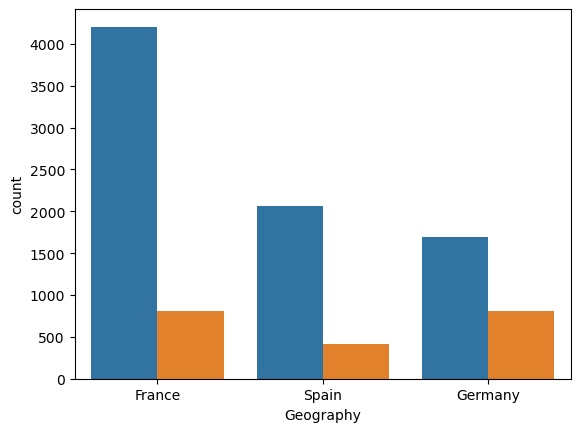

In [116]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited']).columns):
    plt.figure()
    sns.countplot(data=telco_new, x=predictor, hue='Exited')
    plt.title(f'Distribution of {predictor} by Exited')
    plt.xticks(rotation=45)
    plt.show()

Bivariate Analysis

C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Count'>

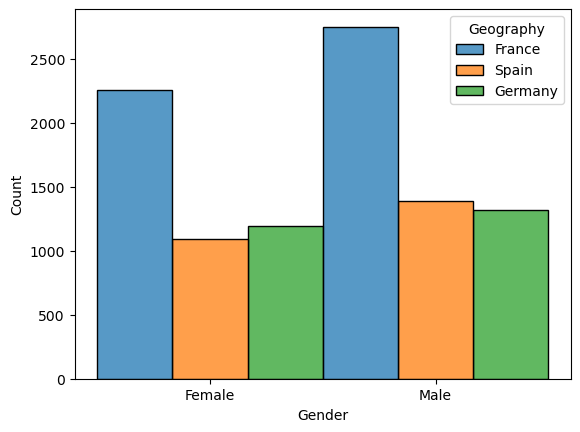

In [86]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat="count", multiple="dodge")

In [87]:
telco_new_target1 = telco_new.loc[telco_new['Exited']==1]

C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Count'>

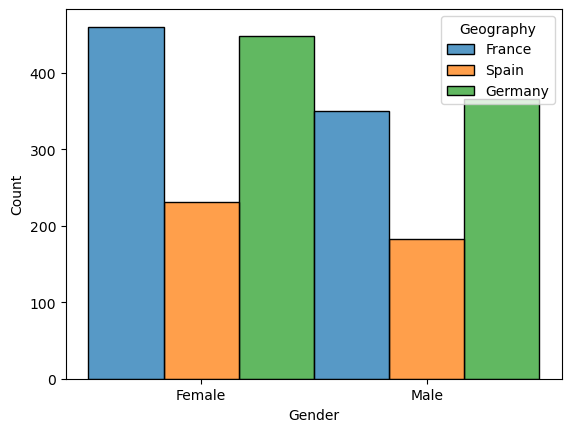

In [88]:
sns.histplot(x='Gender', hue='Geography', data=telco_new_target1, stat="count", multiple="dodge")

Numerical Analysis

Correlation: It ranges from -1 to +1

+1 --> Positive Correlation
-1 --> Negative Correlation
~0 --> No Correlation

In [117]:
telco_base_data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


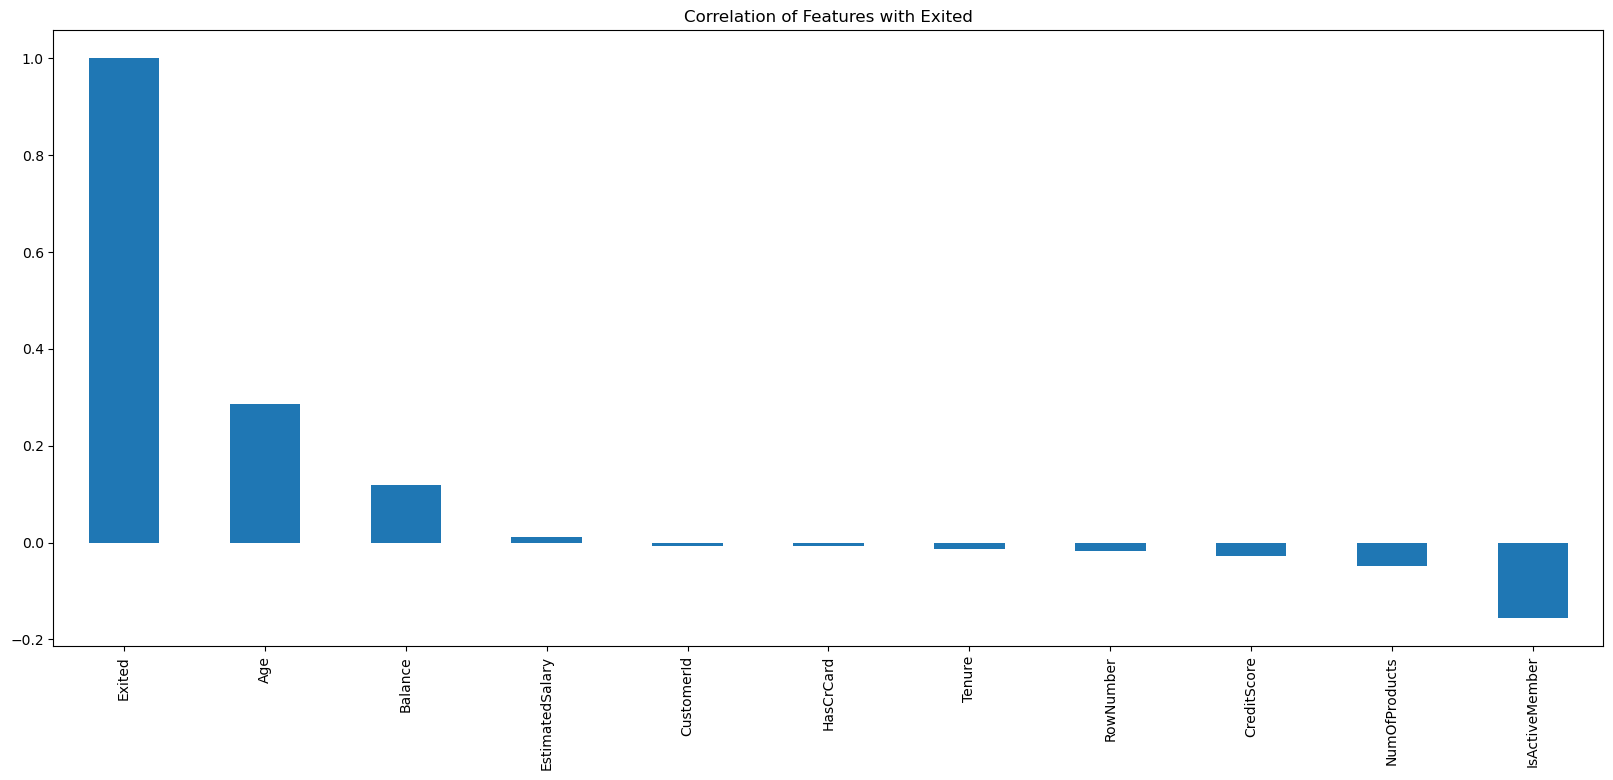

In [118]:

# Ensure that 'Exited' is numeric, otherwise this step may raise an error
plt.figure(figsize=(20,8))

# Select numeric columns for correlation
corr = telco_base_data.select_dtypes(include=['number']).corr()

# Plot the sorted correlations with 'Exited'
corr['Exited'].sort_values(ascending=False).plot(kind='bar')

plt.title('Correlation of Features with Exited')
plt.show()

In [120]:
telco_base_data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


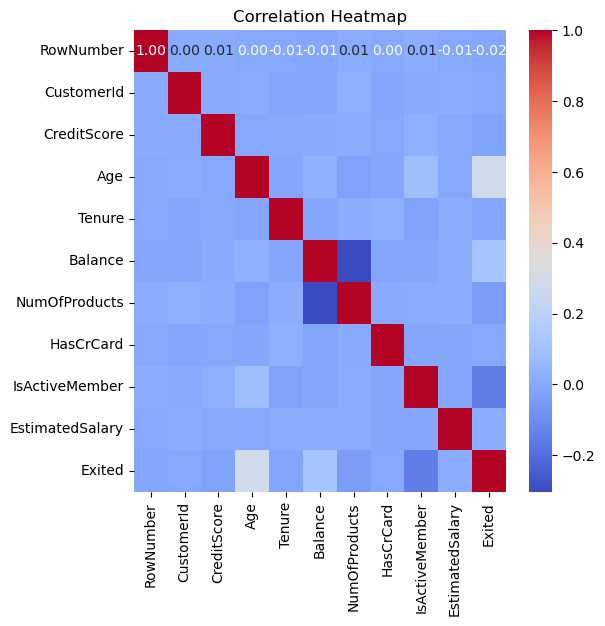

In [122]:
corr = telco_base_data.select_dtypes(include=['number']).corr()

# Plot heatmap with a suitable continuous colormap
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)

plt.title('Correlation Heatmap')
plt.show()

In [102]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age'>

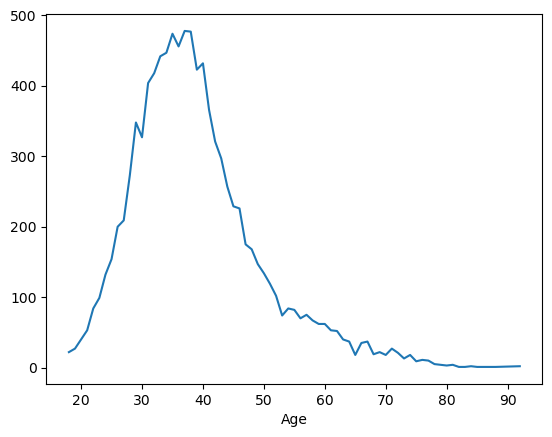

In [103]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

In [104]:
telco_base_data_1 = telco_base_data.loc[telco_base_data["Exited"]==1]

<Axes: xlabel='Age'>

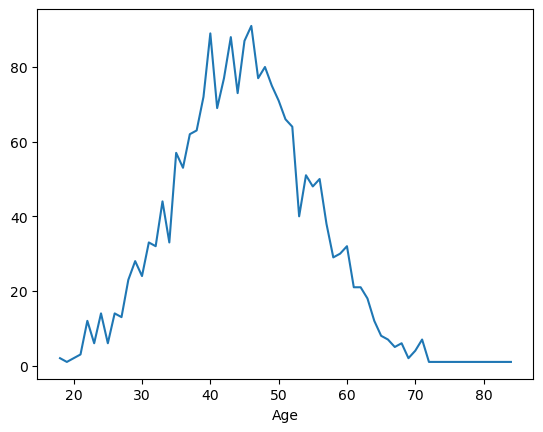

In [105]:
telco_base_data_1['Age'].value_counts().sort_index(ascending=True).plot()

C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\741897501.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\741897501.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

Text(0.5, 1.0, 'Age by churn')

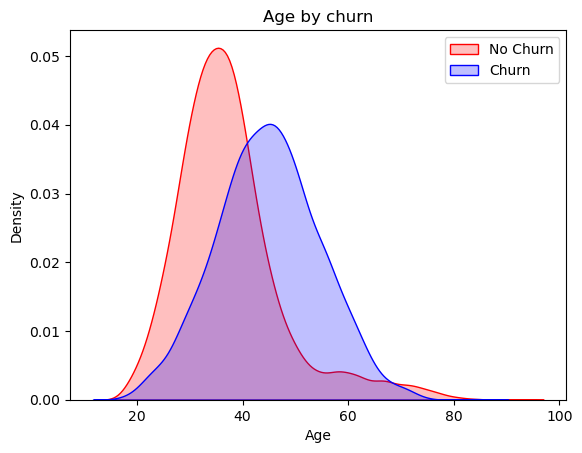

In [106]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\3581521652.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\3581521652.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

Text(0.5, 1.0, 'Tenure by churn')

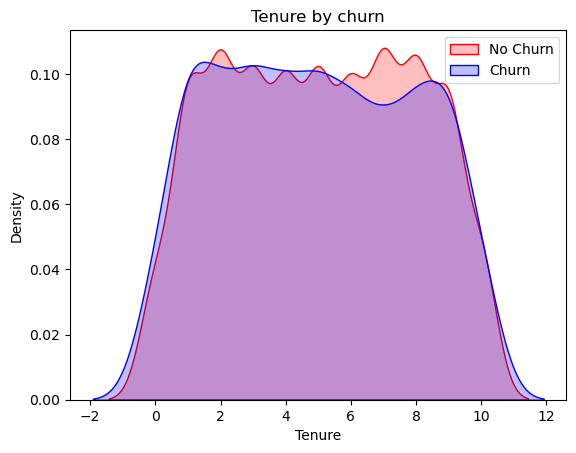

In [107]:
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\1553112863.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vrdella\AppData\Local\Temp\ipykernel_12796\1553112863.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
C:\Users\Vrdella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

Text(0.5, 1.0, 'Balance by churn')

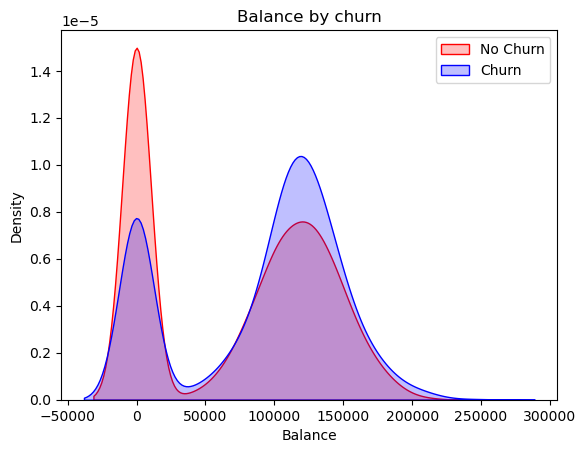

In [108]:
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')

CONCLUSION:
Data Sourcing, Data Cleaning, Feature Scaling and Outlier treatment have been successfully implemented. Missing data and invalid data handled. Different types of statistical analysis and data visualization methods carried out on the dataset to uncover valuable insights.